## Importing modules



In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Importing data

In [2]:
ml_tr=pd.read_csv("ml_case_training_data.csv")
ml_tr_hist=pd.read_csv("ml_case_training_hist_data.csv")
ml_tr_out=pd.read_csv("ml_case_training_output.csv")

### Examining transaction data

## Exploratory data analysis

In [3]:
ml_tr.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
ml_tr_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
ml_tr_out.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## Many inconsistancies. Needs work.

In [6]:
ml_tr.loc[ml_tr.has_gas=='t',"has_gas"]=1
ml_tr.loc[ml_tr.has_gas=='f',"has_gas"]=0

In [7]:
ml_tr = ml_tr.fillna(ml_tr.mean())
ml_tr=ml_tr.drop(columns=["campaign_disc_ele"])

### dropping dulpicates

In [8]:
ml_tr=ml_tr.drop_duplicates('id',keep='first')

### Converting types

In [9]:
ml_tr['date_renewal']= pd.to_datetime(ml_tr['date_renewal'])
ml_tr['date_modif_prod']= pd.to_datetime(ml_tr['date_modif_prod'])
ml_tr['date_first_activ']= pd.to_datetime(ml_tr['date_first_activ'])
ml_tr['date_end']= pd.to_datetime(ml_tr['date_end'])
ml_tr['date_activ']= pd.to_datetime(ml_tr['date_activ'])


-------------------------------------------------------------------------------------------------

In [10]:
ml_tr_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


## No data missing.

-------------------------------------------------------------------------------------------------

In [11]:
ml_tr_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


## Data clearning needed.

In [12]:
ml_tr_hist=ml_tr_hist.dropna()
ml_tr_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191643 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            191643 non-null  object 
 1   price_date    191643 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 13.2+ MB


---------------------------------------------------------------------------------------------------



-------------------------------------------------------------------------------------------------------------

# Feature Engineering

In [13]:
ml_tr = pd.merge(left=ml_tr, right=ml_tr_out, how='left', left_on='id', right_on='id')

## Sub-task 1: Think through what key drivers of churn could be for our client

###  correlation mattrix

In [14]:
ml_tr.corr()


,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.471233,0.919545,0.071443,0.071443,0.080056,0.071527,0.165168,0.139526,-0.043551,...,-0.025326,0.229761,0.139353,-0.065184,-0.045558,0.308567,0.119910,0.008810,0.102422,-0.051759
cons_gas_12m,0.471233,1.000000,0.447209,0.061064,0.061064,0.059547,0.054740,0.059525,0.057619,-0.014407,...,-0.026212,0.372771,0.060609,-0.016866,-0.008242,0.272005,0.058928,-0.008626,0.052365,-0.040880
cons_last_month,0.919545,0.447209,1.000000,0.066250,0.066250,0.065208,0.066546,0.129574,0.151476,-0.037699,...,-0.020017,0.202702,0.153861,-0.054069,-0.037665,0.350711,0.096343,0.004860,0.089565,-0.046931
forecast_base_bill_ele,0.071443,0.061064,0.066250,1.000000,1.000000,0.794776,0.964402,0.344620,0.393361,0.005792,...,0.062149,0.046099,0.414904,-0.044562,-0.027109,0.010411,0.320016,0.008122,0.291136,0.000242
forecast_base_bill_year,0.071443,0.061064,0.066250,1.000000,1.000000,0.794776,0.964402,0.344620,0.393361,0.005792,...,0.062149,0.046099,0.414904,-0.044562,-0.027109,0.010411,0.320016,0.008122,0.291136,0.000242
forecast_bill_12m,0.080056,0.059547,0.065208,0.794776,0.794776,1.000000,0.751430,0.445362,0.327262,0.001822,...,0.086188,0.048229,0.323279,-0.064857,-0.042957,0.010262,0.448393,0.011112,0.353835,0.003869
forecast_cons,0.071527,0.054740,0.066546,0.964402,0.964402,0.751430,1.000000,0.348229,0.399976,0.013351,...,0.043549,0.044415,0.430219,-0.055736,-0.037536,0.011164,0.334018,0.002572,0.227551,-0.002938
forecast_cons_12m,0.165168,0.059525,0.129574,0.344620,0.344620,0.445362,0.348229,1.000000,0.746076,0.014759,...,0.057530,0.062583,0.725550,-0.184120,-0.141596,0.013283,0.768609,0.064431,0.583098,0.007395
forecast_cons_year,0.139526,0.057619,0.151476,0.393361,0.393361,0.327262,0.399976,0.746076,1.000000,-0.008929,...,0.053256,0.038782,0.981732,-0.139138,-0.106546,0.013811,0.537545,0.066105,0.442225,0.002756
forecast_discount_energy,-0.043551,-0.014407,-0.037699,0.005792,0.005792,0.001822,0.013351,0.014759,-0.008929,1.000000,...,0.024477,0.005860,0.011294,0.198510,0.150511,0.055132,0.013423,-0.071420,-0.022107,0.012179


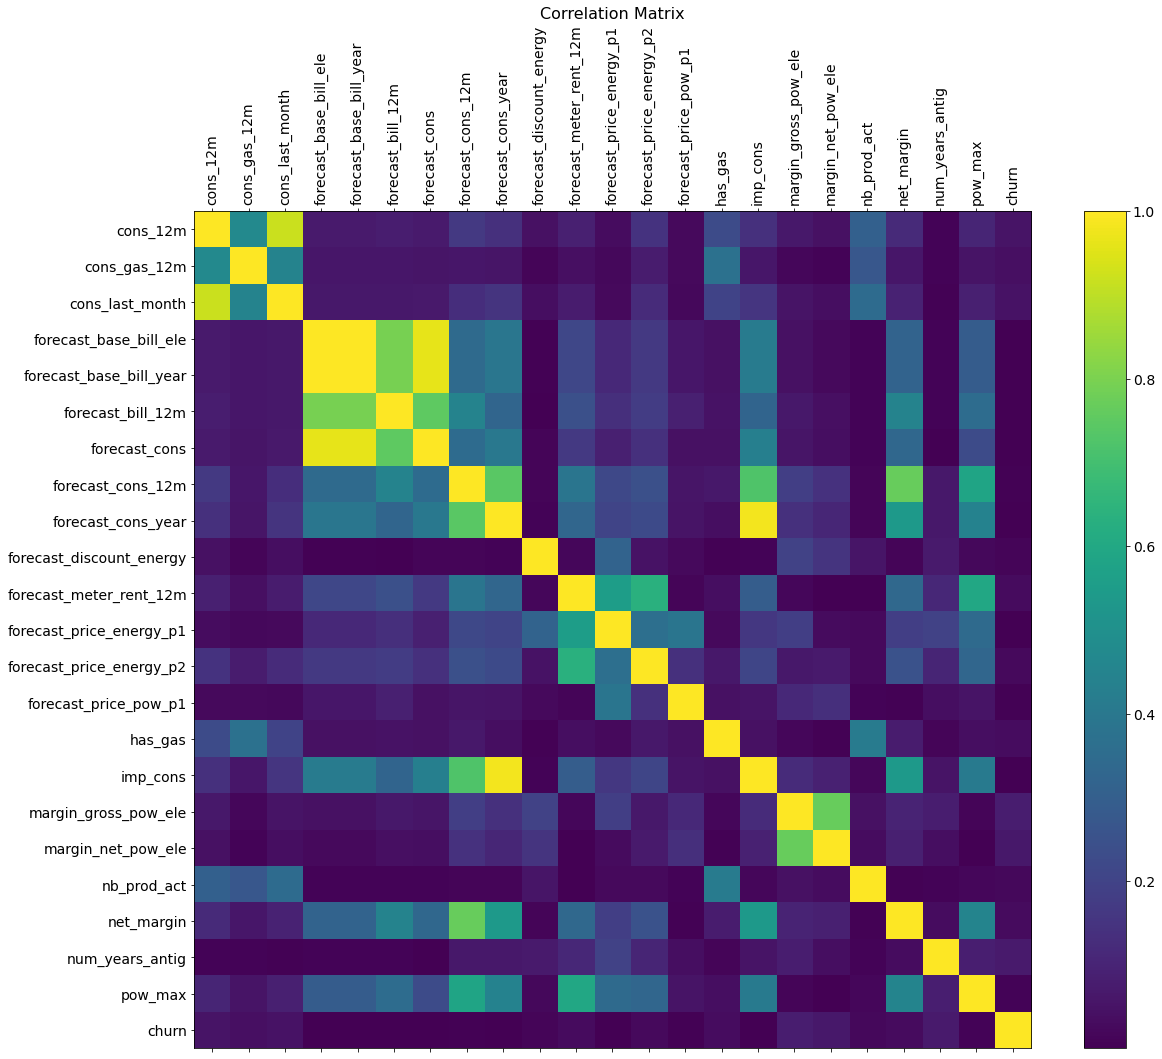

In [15]:
df=ml_tr.copy()
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr().abs(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Selecting imporant features as having corr moire than 0.6

<AxesSubplot:>

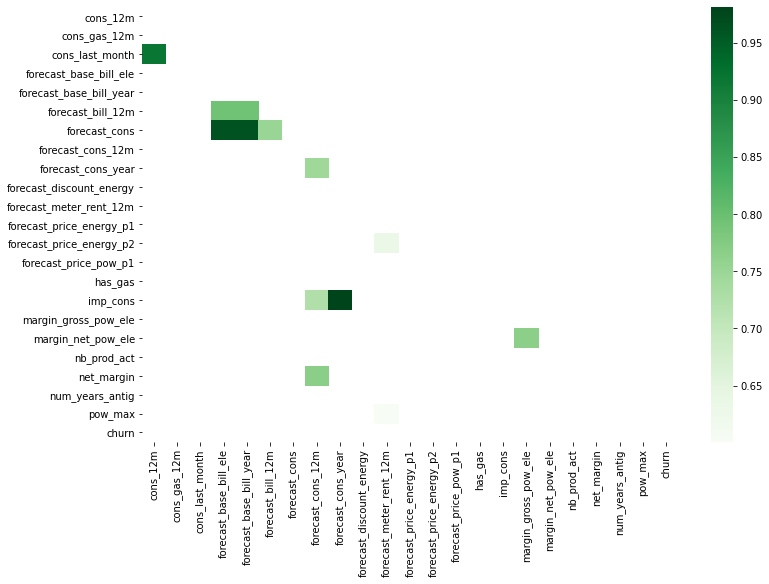

In [16]:
corr = df.corr().abs()

corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

kot = corr[corr>=.6]
kot=kot[kot<1]


plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [17]:
data=kot.unstack().sort_values().drop_duplicates()
print(data)

forecast_meter_rent_12m  pow_max                     0.600566
                         forecast_price_energy_p2    0.632863
forecast_cons_12m        imp_cons                    0.725550
                         forecast_cons_year          0.746076
forecast_bill_12m        forecast_cons               0.751430
margin_gross_pow_ele     margin_net_pow_ele          0.766521
forecast_cons_12m        net_margin                  0.768609
forecast_base_bill_ele   forecast_bill_12m           0.794776
cons_12m                 cons_last_month             0.919545
forecast_base_bill_ele   forecast_cons               0.964402
forecast_cons_year       imp_cons                    0.981732
cons_12m                 cons_12m                         NaN
dtype: float64


In [46]:
names = []

for n in data.index:
    if n[0] not in names:
        names.append(n[0])
    if n[1] not in names:
        names.append(n[1])

names.append("churn")
print("List of usable features : ",names)

List of usable features :  ['forecast_meter_rent_12m', 'pow_max', 'forecast_price_energy_p2', 'forecast_cons_12m', 'imp_cons', 'forecast_cons_year', 'forecast_bill_12m', 'forecast_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'forecast_base_bill_ele', 'cons_12m', 'cons_last_month', 'churn']


## Sub-task 2: Build the features in order to get ready to model

In [47]:
ml_trX=ml_tr[names]

In [48]:
ml_trX.head()

,forecast_meter_rent_12m,pow_max,forecast_price_energy_p2,forecast_cons_12m,imp_cons,forecast_cons_year,forecast_bill_12m,forecast_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,forecast_base_bill_ele,cons_12m,cons_last_month,churn
0,359.29,180.000,0.088347,26520.30,831.8,10025,3837.441866,206.845165,-41.76,-41.76,1732.36,335.843857,309275,10025,0
1,1.78,43.648,0.098142,0.00,0.0,0,3837.441866,206.845165,25.44,25.44,678.99,335.843857,0,0,1
2,16.27,13.800,0.000000,189.95,0.0,0,3837.441866,206.845165,16.38,16.38,18.89,335.843857,4660,0,0
3,38.72,13.856,0.087899,47.96,0.0,0,3837.441866,206.845165,28.60,28.60,6.60,335.843857,544,0,0
4,19.83,13.200,0.000000,240.04,0.0,0,3837.441866,206.845165,30.22,30.22,25.46,335.843857,1584,0,0


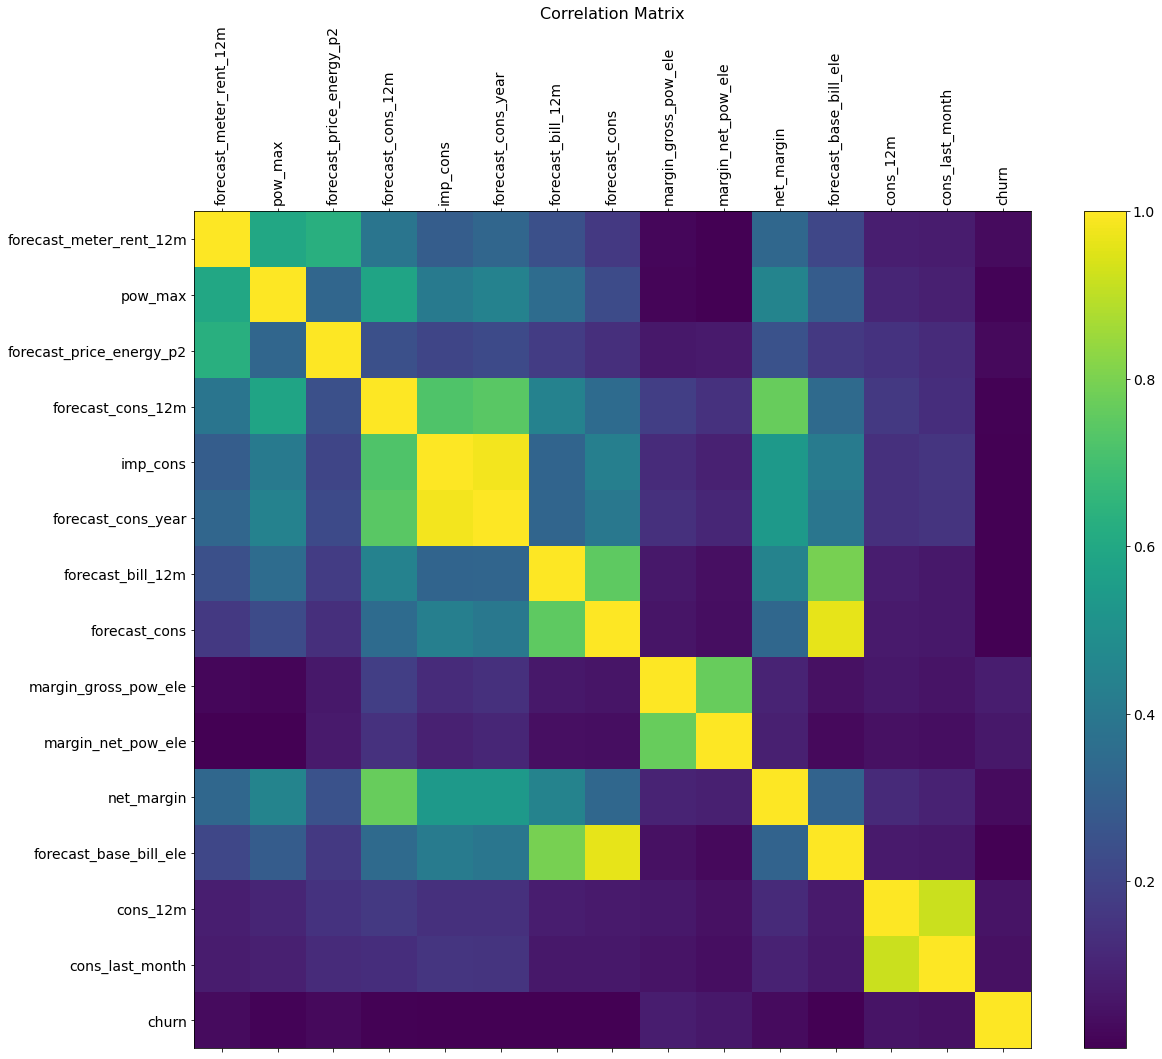

In [49]:
df=ml_trX.copy()
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr().abs(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Modeling

In [50]:
ml_tr['churn']

0        0
1        1
2        0
3        0
4        0
        ..
16091    0
16092    1
16093    1
16094    0
16095    0
Name: churn, Length: 16096, dtype: int64

In [51]:
churn=ml_tr['churn']
ml_tr.shape

(16096, 32)

In [56]:
import pycaret
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import tune_model


grid = setup(data=ml_trX, target="churn", html=False, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
qda,Quadratic Discriminant Analysis,0.8630,0.5595,0.0767,0.1571,0.0994,0.0354,0.0396,0.022
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
qda,Quadratic Discriminant Analysis,0.8630,0.5595,0.0767,0.1571,0.0994,0.0354,0.0396,0.022
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
gbc,Gradient Boosting Classifier,0.8996,0.6715,0.0134,0.3342,0.0255,0.0191,0.0511,0.718
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
qda,Quadratic Discriminant Analysis,0.8630,0.5595,0.0767,0.1571,0.0994,0.0354,0.0396,0.022
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018
dt,Decision Tree Classifier,0.8254,0.5427,0.1898,0.1670,0.1774,0.0803,0.0806,0.057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lda,Linear Discriminant Analysis,0.8999,0.6125,0.0071,0.2750,0.0139,0.0101,0.0341,0.015
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
gbc,Gradient Boosting Classifier,0.8996,0.6715,0.0134,0.3342,0.0255,0.0191,0.0511,0.718
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
qda,Quadratic Discriminant Analysis,0.8630,0.5595,0.0767,0.1571,0.0994,0.0354,0.0396,0.022
nb,Naive Bayes,0.8572,0.6023,0.0927,0.1508,0.1141,0.0415,0.0432,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lda,Linear Discriminant Analysis,0.8999,0.6125,0.0071,0.2750,0.0139,0.0101,0.0341,0.015
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
gbc,Gradient Boosting Classifier,0.8996,0.6715,0.0134,0.3342,0.0255,0.0191,0.0511,0.718
et,Extra Trees Classifier,0.8996,0.6466,0.0713,0.4751,0.1235,0.1002,0.1537,0.320
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020
qda,Quadratic Discriminant Analysis,0.8630,0.5595,0.0767,0.1571,0.0994,0.0354,0.0396,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
lightgbm,Light Gradient Boosting Machine,0.9009,0.6659,0.0428,0.5326,0.0784,0.0647,0.1277,0.111
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lda,Linear Discriminant Analysis,0.8999,0.6125,0.0071,0.2750,0.0139,0.0101,0.0341,0.015
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
gbc,Gradient Boosting Classifier,0.8996,0.6715,0.0134,0.3342,0.0255,0.0191,0.0511,0.718
et,Extra Trees Classifier,0.8996,0.6466,0.0713,0.4751,0.1235,0.1002,0.1537,0.320
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9015,0.6569,0.0427,0.5871,0.0793,0.0664,0.1373,0.597
lightgbm,Light Gradient Boosting Machine,0.9009,0.6659,0.0428,0.5326,0.0784,0.0647,0.1277,0.111
ridge,Ridge Classifier,0.9003,0.0000,0.0009,0.1000,0.0018,0.0012,0.0070,0.019
lda,Linear Discriminant Analysis,0.8999,0.6125,0.0071,0.2750,0.0139,0.0101,0.0341,0.015
ada,Ada Boost Classifier,0.8998,0.6532,0.0053,0.3367,0.0104,0.0072,0.0306,0.189
gbc,Gradient Boosting Classifier,0.8996,0.6715,0.0134,0.3342,0.0255,0.0191,0.0511,0.718
et,Extra Trees Classifier,0.8996,0.6466,0.0713,0.4751,0.1235,0.1002,0.1537,0.320
lr,Logistic Regression,0.8971,0.5409,0.0044,0.0983,0.0085,0.0005,0.0007,0.103
knn,K Neighbors Classifier,0.8971,0.5638,0.0757,0.4091,0.1273,0.0996,0.1412,0.042
svm,SVM - Linear Kernel,0.8842,0.0000,0.0268,0.1714,0.0355,0.0087,0.0190,0.020


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2170, verbose=0,
                       warm_start=False)


# best model >>  Light Gradient Boosting Machine
# Accuracy >> 90%